In [1]:
import pandas as pd
import datetime
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ptk

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB   
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix

from textblob import TextBlob

sns.set(style="whitegrid")
%matplotlib inline

plt.rcParams['figure.figsize'] = (16, 6)
plt.rcParams['font.size'] = 18
plt.style.use("fivethirtyeight")
sns.set(style="whitegrid")

In [2]:
df = pd.read_csv('./original_tweets_corpes.csv')
df['tweet_dates']= pd.to_datetime(df['tweet_dates'], errors = 'coerce')

In [3]:
df.sample(n=6)

,source,text,retweet_count,favorite_count,is_retweet,tweet_dates
519,Twitter for iPhone,Wow! Morning Joe &amp; Psycho ratings have rea...,18877.0,93051.0,False,2019-07-30 12:11:02
3523,Twitter for iPhone,Best Jobs Numbers in the history of our great ...,24007.0,99191.0,False,2018-10-21 19:26:12
18991,Twitter for Android,"""@phillynutt68: My only Question to @realDonal...",8.0,32.0,False,2015-01-20 02:09:18
5209,Twitter for iPhone,Today I had the great honor of awarding the Co...,13271.0,63850.0,False,2018-05-01 16:57:13
36123,Twitter Web Client,The @BarackObama campaign took in $39M in May ...,589.0,54.0,False,2012-06-21 19:37:46
5385,Twitter for iPhone,....to pay. Open area immediately for medical ...,15616.0,67780.0,False,2018-04-08 13:04:22


In [4]:
df["favorite_count"].describe()

count     38189.000000
mean      21616.210008
std       41552.669856
min           0.000000
25%          27.000000
50%         180.000000
75%       19848.000000
max      879647.000000
Name: favorite_count, dtype: float64

In [5]:
annual_median = df.groupby(by=df["tweet_dates"].dt.year)["favorite_count"].median()
df["fave_count_adj"] = df["favorite_count"] / annual_median[df["tweet_dates"].dt.year.values].values

In [6]:
df["fave_count_adj"].describe()

count    38189.000000
mean         4.157976
std         45.873473
min          0.000000
25%          0.489796
50%          1.000000
75%          2.222222
max       3813.115385
Name: fave_count_adj, dtype: float64

Text(0.5, 1.0, 'testing the possible bin sizes')

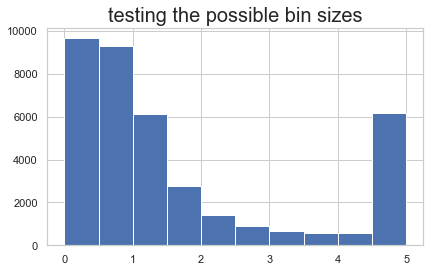

In [7]:
df['fave_count_adj'].clip(upper=5.0).hist()
plt.title('testing the possible bin sizes', fontsize = 20)

In [8]:
cuts = [-1, 1, 5, np.inf]
engage_category = ['low', 'med', 'high']
df['engagement'] = pd.cut(df['fave_count_adj'].values, bins = cuts, labels = engage_category)

In [9]:
df['engagement'].value_counts()

low     19219
med     13268
high     5702
Name: engagement, dtype: int64

In [10]:
low_class = 19115

## Naive Bayes Classification Model

In [11]:
X = df['text']
y = df['engagement']

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state= 4)
vect = CountVectorizer(lowercase = True)
X_train_dtm = vect.fit_transform(X_train)
X_test_dtm = vect.transform(X_test)
nb = MultinomialNB()
nb.fit(X_train_dtm, y_train)
y_pred_class = nb.predict(X_test_dtm)
NB_CV_accuracy = metrics.accuracy_score(y_test, y_pred_class)
X_train_dtm.shape

(28641, 29629)

In [15]:
print("Baseline accuracy is {}%".format((low_class / 37980) * 100))
print("Using NB model accuracy is {}%".format(NB_CV_accuracy * 100))

Baseline accuracy is 50.3291205897841%
Using NB model accuracy is 61.19606200251362%


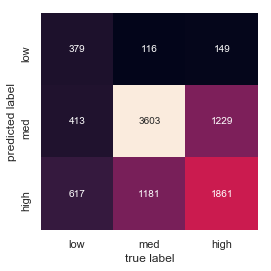

In [16]:
confusion_mat = confusion_matrix(y_test, y_pred_class)

#mat = confusion_matrix(test.target, labels)
sns.heatmap(confusion_mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=['low', 'med', 'high'], yticklabels=['low', 'med', 'high'])
plt.xlabel('true label')
plt.ylabel('predicted label');

In [17]:
#Using TfidVectorizer() which normalizes the matrix values
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state= 4)
vect_TFID = TfidfVectorizer(lowercase = True)
X_train_dtm = vect_TFID.fit_transform(X_train)
X_test_dtm = vect_TFID.transform(X_test)
nb = MultinomialNB()
nb.fit(X_train_dtm, y_train)
y_pred_class = nb.predict(X_test_dtm)
NB_TFI_accuracy = metrics.accuracy_score(y_test, y_pred_class)
X_train_dtm.shape

(28641, 29629)

In [66]:
print("Baseline accuracy is {}%".format((low_class / 37980) * 100))
print("Using NB model accuracy is {}%".format(NB_CV_accuracy * 100))
print("Using NB model using the TfidVectorizer accuracy is {}%".format(NB_TFI_accuracy * 100))

Baseline accuracy is 50.3291205897841%
Using NB model accuracy is 61.19606200251362%
Using NB model using the TfidVectorizer accuracy is 59.530791788856305%


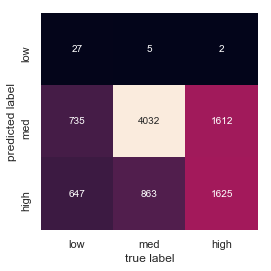

In [18]:
confusion_mat = confusion_matrix(y_test, y_pred_class)

#mat = confusion_matrix(test.target, labels)
sns.heatmap(confusion_mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=['low', 'med', 'high'], yticklabels=['low', 'med', 'high'])
plt.xlabel('true label')
plt.ylabel('predicted label');

## Modifying the parameters of countvectorizer
I printed the number of features each X_train_dtm collects everytime I change a parameter of CountVectorizer() to show a corrolation between higher number of features and accuracy 
## stop_words


In [67]:
#string {‘english’}
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state= 4)
vect = CountVectorizer(lowercase = True, stop_words = 'english')
X_train_dtm = vect.fit_transform(X_train)
X_test_dtm = vect.transform(X_test)
nb = MultinomialNB()
nb.fit(X_train_dtm, y_train)
y_pred_class = nb.predict(X_test_dtm)
print("Accuracy: ",metrics.accuracy_score(y_test, y_pred_class)*100)
X_train_dtm.shape

Accuracy:  61.70925848345203


(28641, 29337)

## min_df + stop_words

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state= 4)
vect = CountVectorizer(lowercase = True, stop_words = 'english', min_df = 2)
X_train_dtm = vect.fit_transform(X_train)
X_test_dtm = vect.transform(X_test)
nb = MultinomialNB()
nb.fit(X_train_dtm, y_train)
y_pred_class = nb.predict(X_test_dtm)
print("Accuracy: ",metrics.accuracy_score(y_test, y_pred_class)*100)
X_train_dtm.shape

Accuracy:  62.107247591118565


(28641, 12694)

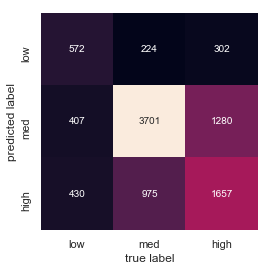

In [13]:
confusion_mat = confusion_matrix(y_test, y_pred_class)

#mat = confusion_matrix(test.target, labels)
sns.heatmap(confusion_mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=['low', 'med', 'high'], yticklabels=['low', 'med', 'high'])
plt.xlabel('true label')
plt.ylabel('predicted label');

## min_df alone doesn't improve performance

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state= 4)
vect = CountVectorizer(lowercase = True, min_df = 2)
X_train_dtm = vect.fit_transform(X_train)
X_test_dtm = vect.transform(X_test)
nb = MultinomialNB()
nb.fit(X_train_dtm, y_train)
y_pred_class = nb.predict(X_test_dtm)
print("Accuracy: ",metrics.accuracy_score(y_test, y_pred_class)*100)
X_train_dtm.shape

Accuracy:  61.61499790532049


(28641, 12977)

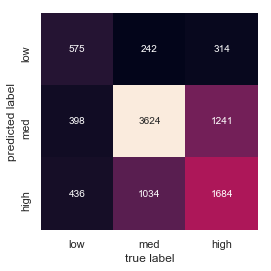

In [20]:
confusion_mat = confusion_matrix(y_test, y_pred_class)

#mat = confusion_matrix(test.target, labels)
sns.heatmap(confusion_mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=['low', 'med', 'high'], yticklabels=['low', 'med', 'high'])
plt.xlabel('true label')
plt.ylabel('predicted label');

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state= 4)
vect = CountVectorizer(lowercase = True, min_df = 4)
X_train_dtm = vect.fit_transform(X_train)
X_test_dtm = vect.transform(X_test)
nb = MultinomialNB()
nb.fit(X_train_dtm, y_train)
y_pred_class = nb.predict(X_test_dtm)
print("Accuracy: ",metrics.accuracy_score(y_test, y_pred_class)*100)
X_train_dtm.shape

Accuracy:  61.05990783410138


(28641, 7444)

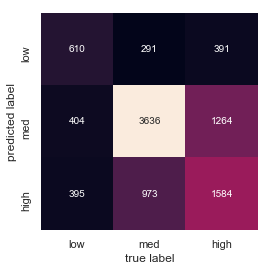

In [22]:
confusion_mat = confusion_matrix(y_test, y_pred_class)

#mat = confusion_matrix(test.target, labels)
sns.heatmap(confusion_mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=['low', 'med', 'high'], yticklabels=['low', 'med', 'high'])
plt.xlabel('true label')
plt.ylabel('predicted label');

## ngram_range

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state= 4)
vect = CountVectorizer(lowercase = True, ngram_range=(1,2))
X_train_dtm = vect.fit_transform(X_train)
X_test_dtm = vect.transform(X_test)
nb = MultinomialNB()
nb.fit(X_train_dtm, y_train)
y_pred_class = nb.predict(X_test_dtm)
print("Accuracy: ",metrics.accuracy_score(y_test, y_pred_class)*100)
X_train_dtm.shape

Accuracy:  61.405529953917046


(28641, 234978)

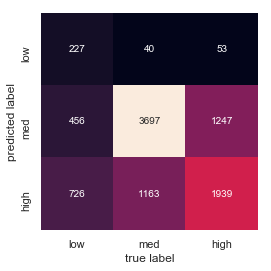

In [24]:
confusion_mat = confusion_matrix(y_test, y_pred_class)

#mat = confusion_matrix(test.target, labels)
sns.heatmap(confusion_mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=['low', 'med', 'high'], yticklabels=['low', 'med', 'high'])
plt.xlabel('true label')
plt.ylabel('predicted label');

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state= 4)
vect = CountVectorizer(lowercase = True, ngram_range=(1,3))
X_train_dtm = vect.fit_transform(X_train)
X_test_dtm = vect.transform(X_test)
nb = MultinomialNB()
nb.fit(X_train_dtm, y_train)
y_pred_class = nb.predict(X_test_dtm)
print("Accuracy: ",metrics.accuracy_score(y_test, y_pred_class)*100)
X_train_dtm.shape

Accuracy:  61.20653540008378


(28641, 594783)

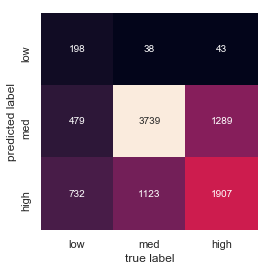

In [26]:
confusion_mat = confusion_matrix(y_test, y_pred_class)

#mat = confusion_matrix(test.target, labels)
sns.heatmap(confusion_mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=['low', 'med', 'high'], yticklabels=['low', 'med', 'high'])
plt.xlabel('true label')
plt.ylabel('predicted label');

# Sentiment Analysis

In [11]:
#Creating function to apply a library method to series
#-1 is most negative sentiment rank, 1 is the most positive
def detect_sentiment(tweet):
    return TextBlob(tweet).sentiment.polarity

In [12]:
df['sentiment_rank'] = df['text'].apply(detect_sentiment)

In [13]:
df.sample(n=4)

,source,text,retweet_count,favorite_count,is_retweet,tweet_dates,fave_count_adj,engagement,sentiment_rank
23211,Twitter for Android,"""@LaytonJPalmer: @realDonaldTrump for presiden...",65.0,89.0,False,2014-06-17 10:43:13,1.816327,med,0.000000
27078,Twitter for Android,American Exceptionalism and the Navy Yard shoo...,72.0,40.0,False,2013-09-17 11:26:10,2.222222,med,0.013889
33530,Twitter Web Client,@shineb4 @jayleno @billmaher Thanks,1.0,0.0,False,2013-01-08 21:32:13,0.000000,low,0.200000
33340,Twitter Web Client,... Is a third party coming? I hope not.,75.0,64.0,False,2013-01-15 20:05:36,3.555556,med,0.000000


In [14]:
df['sentiment_rank'].describe()

count    38189.000000
mean         0.184221
std          0.357710
min         -1.000000
25%          0.000000
50%          0.100000
75%          0.400000
max          1.000000
Name: sentiment_rank, dtype: float64

C:\Users\fs4re\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5, 1.0, 'Distribution of the sentiment rank')

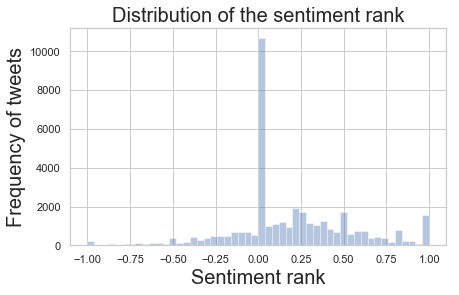

In [15]:
sns.distplot(df['sentiment_rank'], hist = True, kde = False);
plt.xlabel('Sentiment rank',fontsize = 20);
plt.ylabel('Frequency of tweets',fontsize = 20);
plt.title('Distribution of the sentiment rank', fontsize = 20)

In [16]:
#Since the values of sentiment_rank are close to one another and somehow distributed evenly
# I made the cuts based on values -1 to 0, 0 to 0.5, 0.5 to 1
cuts = [-1, 0, 0.5, 1]
senti_category = ['negative', 'neutral', 'positive']
df['sentiment'] = pd.cut(df['sentiment_rank'].values, bins = cuts, labels = senti_category)

Text(0.5, 0, 'Sentiment categories')

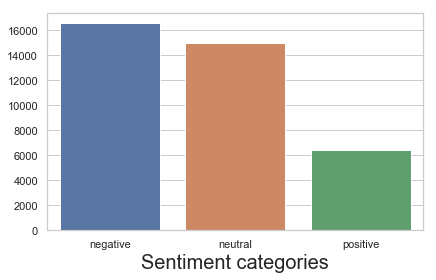

In [17]:
sns.barplot(x = df['sentiment'].value_counts().index, y = df['sentiment'].value_counts().values)
plt.xlabel('Sentiment categories', fontsize = 20)

In [18]:
def detect_sentiment_subj(tweet):
    return TextBlob(tweet).sentiment.subjectivity
df['subjectivity_rank'] = df['text'].apply(detect_sentiment)

In [19]:
df.sample(n=2)

,source,text,retweet_count,favorite_count,is_retweet,tweet_dates,fave_count_adj,engagement,sentiment_rank,sentiment,subjectivity_rank
5236,Twitter for iPhone,I urge all Americans to participate in #takeba...,11885.0,49952.0,False,2018-04-27 19:23:23,0.599736,low,0.250000,neutral,0.250000
6458,Twitter for iPhone,The Democrats in the Southwest part of Virgini...,16003.0,71175.0,False,2017-10-14 21:27:22,0.937889,low,-0.194444,negative,-0.194444


Text(0.5, 1.0, 'How subjective his language is')

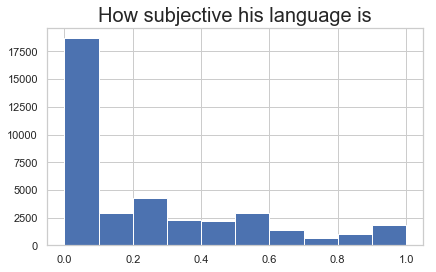

In [20]:
df['subjectivity_rank'].clip(lower = 0.0,upper=1.0).hist()
plt.title('How subjective his language is', fontsize = 20)

In [21]:
#Interval is objective 0.0 to subjective 1.0
cuts = [0.0, 0.5, 1]
category = ['objective', 'subjective']
df['subjectivity'] = pd.cut(df['subjectivity_rank'].values, bins = cuts, labels = category)

Text(0.5, 0, 'Subjectivity')

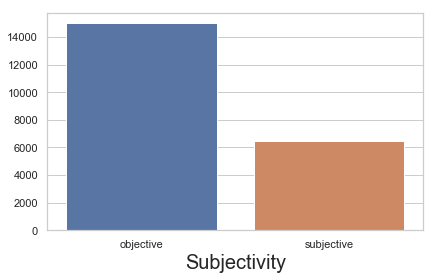

In [23]:
sns.barplot(x = df['subjectivity'].value_counts().index, y = df['subjectivity'].value_counts().values)
plt.xlabel('Subjectivity', fontsize = 20)

In [27]:
cuts = [0.0, 0.5,0.55, 1]
category = ['objective', 'middle', 'subjective']
df['subjectivity_modified'] = pd.cut(df['subjectivity_rank'].values, bins = cuts, labels = category)

In [28]:
df['subjectivity_rank'].describe()

count    38189.000000
mean         0.184221
std          0.357710
min         -1.000000
25%          0.000000
50%          0.100000
75%          0.400000
max          1.000000
Name: subjectivity_rank, dtype: float64

Text(0.5, 0, 'Subjectivity with more specific bins')

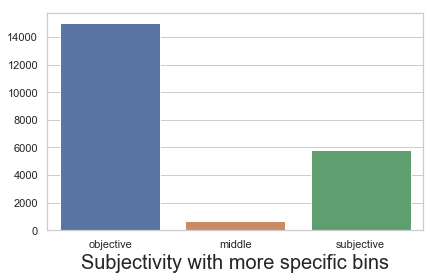

In [30]:
sns.barplot(x = df['subjectivity_modified'].value_counts().index, y = df['subjectivity_modified'].value_counts().values)
plt.xlabel('Subjectivity with more specific bins', fontsize = 20)

In [50]:
g = df.groupby(by = df["tweet_dates"].dt.year)['sentiment']
nine = g.get_group(2019)
type(nine)

pandas.core.series.Series

In [52]:
#sns.distplot(x = nine.index, hist = True)

In [35]:
#A function that can detect how popular a work or phrase is in the tweets 
def catch_phrase_finder(tweet):
    blob = TextBlob(tweet)
    return blob.words.count('Obama')

In [36]:
loser = df['text'].apply(catch_phrase_finder)
df[loser.values > 0].shape

(122, 13)

In [83]:
sad = df['text'].apply(catch_phrase_finder)
df[sad.values > 0].shape

(272, 10)

In [87]:
Russia = df['text'].apply(catch_phrase_finder)
df[Russia.values > 0].shape

(305, 10)

In [54]:
Iran = df['text'].apply(catch_phrase_finder)
df[Iran.values > 0].shape

(285, 10)

In [37]:
Obama = df['text'].apply(catch_phrase_finder)
df[Obama.values > 0].shape

(122, 13)

In [44]:
blobby_tweets = []
for tweet in df['text']:
    blobby_tweets.append(tweet)

In [46]:
type(blobby_tweets[0])

str